### importing the libraries

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np # linear algebra
import pandas as pd
import os
print(os.listdir("/content/drive/MyDrive/Fall 2021/CSE498R/Dataset/Strokefaces"))


['Traning Set', 'Validation Set', 'Test Set']


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import EarlyStopping, TensorBoard, CSVLogger, ReduceLROnPlateau, ModelCheckpoint
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [5]:
train_data_dir = '/content/drive/MyDrive/Fall 2021/CSE498R/Dataset/Strokefaces/Traning Set'
img_width, img_height = 224, 224 
batch_size = 32
validation_dir = '/content/drive/MyDrive/Fall 2021/CSE498R/Dataset/Strokefaces/Validation Set'


In [6]:
pip install Keras-Applications

     |████████████████████████████████| 50 kB 7.2 MB/s 


### Image Augmentation

In [7]:
image_size = 224

#from keras.applications import preprocess_input
#model = MobileNetV2(include_top=False, input_shape=(224, 224, 3),weights="imagenet")
data_generator = ImageDataGenerator(
                                    horizontal_flip=True,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    validation_split=0.2)# set validation split

train_generator = data_generator.flow_from_directory(
    train_data_dir,
    target_size=(image_size, image_size),
    batch_size=200,
    class_mode='categorical',
    subset='training'
    )
validation_generator = data_generator.flow_from_directory(
    validation_dir,
    target_size=(image_size, image_size),
    batch_size=10,
    class_mode='categorical',
    subset='validation'
    )

Found 1707 images belonging to 2 classes.
Found 125 images belonging to 2 classes.


### Hyperparameters

In [8]:
# Hyperparameters

from tensorflow.keras.optimizers import Adam, SGD
model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Do not train first layer (ResNet) as it is already pre-trained
model.layers[0].trainable = False

# Compile model
from tensorflow.python.keras import optimizers


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

94781440/94765736 [==============================] - 1s 0us/step


In [9]:
NUM_EPOCHS = 10

In [10]:
import math

fit_history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    verbose=1)
       

Epoch 1/10
8/8 [==============================] - 276s 38s/step - loss: 0.9004 - accuracy: 0.6944 - val_loss: 0.3882 - val_accuracy: 0.7917
Epoch 2/10
8/8 [==============================] - 23s 3s/step - loss: 0.2284 - accuracy: 0.9064 - val_loss: 0.1809 - val_accuracy: 0.9667
Epoch 3/10
8/8 [==============================] - 21s 3s/step - loss: 0.1107 - accuracy: 0.9635 - val_loss: 0.2046 - val_accuracy: 0.9000
Epoch 4/10
8/8 [==============================] - 21s 3s/step - loss: 0.0842 - accuracy: 0.9728 - val_loss: 0.1594 - val_accuracy: 0.9167
Epoch 5/10
8/8 [==============================] - 21s 3s/step - loss: 0.0517 - accuracy: 0.9821 - val_loss: 0.2248 - val_accuracy: 0.9083
Epoch 6/10
8/8 [==============================] - 21s 3s/step - loss: 0.0586 - accuracy: 0.9774 - val_loss: 0.1080 - val_accuracy: 0.9500
Epoch 7/10
8/8 [==============================] - 22s 3s/step - loss: 0.0408 - accuracy: 0.9867 - val_loss: 0.2451 - val_accuracy: 0.9000
Epoch 8/10
8/8 [================

### **Result**

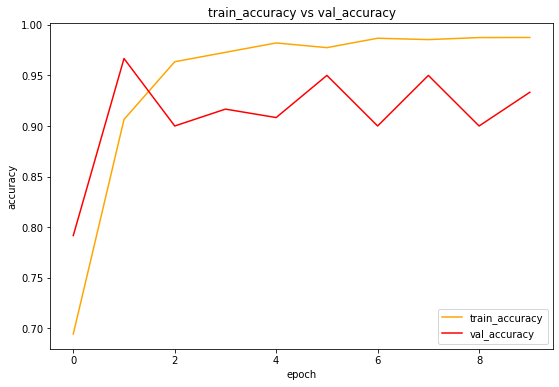

In [11]:
f = plt.figure()
f.set_figwidth(9)
f.set_figheight(6)
plt.plot(fit_history.history['accuracy'], color='orange')
plt.plot(fit_history.history['val_accuracy'], color='red')
plt.title('train_accuracy vs val_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc=4)
plt.show()

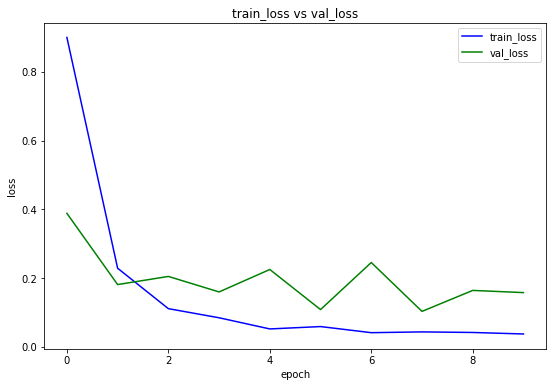

In [12]:
f = plt.figure()
f.set_figwidth(9)
f.set_figheight(6)
plt.plot(fit_history.history['loss'], color='blue')
plt.plot(fit_history.history['val_loss'], color='green')
plt.title('train_loss vs val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [13]:
from keras.models import load_model
from tensorflow import keras

save_model = model.save("ResNet50.h5")

NotImplementedError: ignored

In [ ]:
|